<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/CIFAR_10_Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Dependencies

In [1]:
pip install tensorflow

In [14]:
# install libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Load the Dataset

In [4]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print dataset shape
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3), Labels: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels: (10000, 1)


###  CIFAR-10 Details:

- (50000, 32, 32, 3) → 50,000 images, each 32x32 pixels, 3 color channels (RGB).
- (10000, 32, 32, 3) → 10,000 test images with the same dimensions.
- (50000, 1) → Labels for 50,000 training images.
- (10000, 1) → Labels for 10,000 test images.

### View Class Labels

In [5]:
# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Print the first 10 labels with their class names
print("First 10 labels in the training set:")
print([class_names[label[0]] for label in y_train[:10]])

First 10 labels in the training set:
['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


### Visualize Some Images

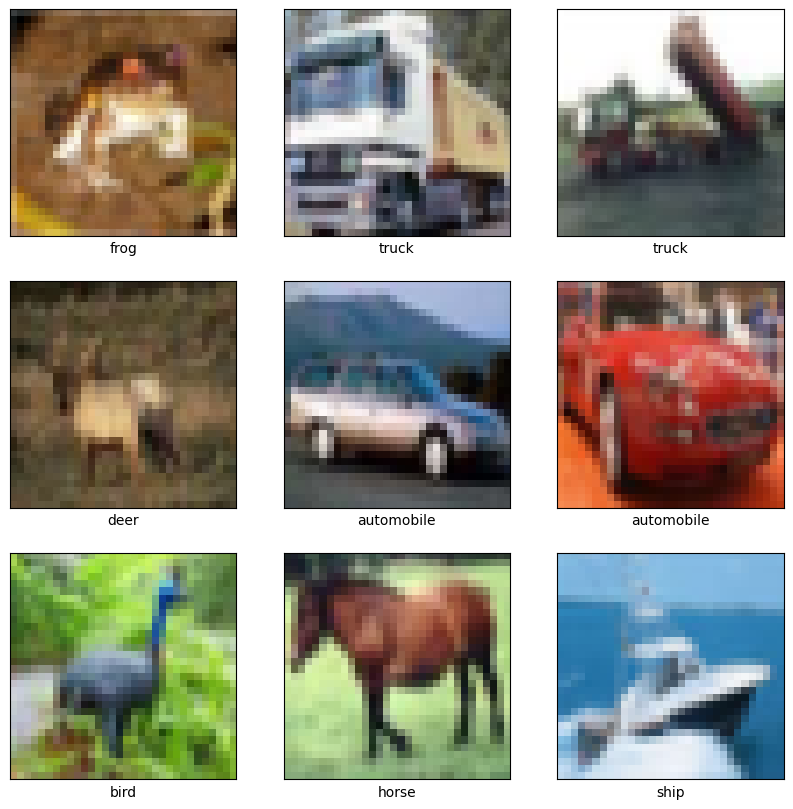

In [8]:
# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])  # Show image
    plt.xlabel(class_names[y_train[i][0]])  # Label with class name
plt.show()

## preprocessing the data.

### Normalize the pixel values
- Since the pixel values range from 0 to 255, we need to scale them between 0 and 1 for better training performance.

In [9]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

### Convert Labels to Categorical Format
- Since the labels are currently integers (0-9), we need to convert them into one-hot encoding for the neural network.

In [10]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print shape to confirm
print(f"New shape of y_train: {y_train.shape}")
print(f"New shape of y_test: {y_test.shape}")

New shape of y_train: (50000, 10)
New shape of y_test: (10000, 10)


### Define the CNN Model

In [15]:
# Define the CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicit input layer
    Conv2D(32, (3,3), activation='relu'),  # First convolutional layer
    MaxPooling2D((2,2)),  # Pooling layer to reduce dimensions
    Conv2D(64, (3,3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2,2)),
    Flatten(),  # Flattening the output
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer for classification
])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### Breakdown of CNN Layers

#### Conv2D (32 filters, 3x3 kernel, ReLU activation)
- Extracts features from the image.  
- Reduces spatial dimensions slightly (from 32x32 to 30x30).  

#### MaxPooling2D (2x2 pooling)
- Reduces dimensionality (from 30x30 to 15x15), making the model more efficient.  

#### Conv2D (64 filters, 3x3 kernel, ReLU activation)
- Detects more complex patterns.  

#### MaxPooling2D (2x2 pooling)
- Further reduces dimensions (from 13x13 to 6x6).  

#### Flatten
- Converts the 3D feature maps into a 1D vector for the Dense layer.  

#### Dense (128 neurons, ReLU activation)
- Fully connected layer to learn patterns.  

#### Dropout
- Prevents overfitting by randomly dropping neurons during training.  

#### Dense (10 neurons, Softmax activation)
- Output layer for 10-class classification.  


### **Compiling the Model**  

Before training the model, I need to specify key parameters:  

- **Loss function**: Since this is a multi-class classification problem and my labels are **one-hot encoded**, I use `"categorical_crossentropy"`. This loss function compares the predicted probability distribution with the actual class labels, helping the model learn effectively.  

- **Optimizer**: I chose the **Adam optimizer**, as it is an adaptive optimization algorithm that efficiently adjusts learning rates, making training faster and more stable.  

- **Metrics**: To evaluate model performance, I track `"accuracy"`, which measures how often the model's predictions match the actual labels.  


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [17]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 75ms/step - accuracy: 0.3121 - loss: 1.8705 - val_accuracy: 0.5174 - val_loss: 1.3347
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.5191 - loss: 1.3522 - val_accuracy: 0.6038 - val_loss: 1.1146
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.5728 - loss: 1.2132 - val_accuracy: 0.6400 - val_loss: 1.0416
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6076 - loss: 1.1172 - val_accuracy: 0.6590 - val_loss: 0.9773
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6322 - loss: 1.0441 - val_accuracy: 0.6620 - val_loss: 0.9690
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6536 - loss: 0.9836 - val_accuracy: 0.6699 - val_loss: 0.9579
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.6657 - loss: 0.9510 - val_accuracy: 0.6892 - val_loss: 0.8996
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.6804 - loss: 0.9054 - 

### Visualizing Training Progress

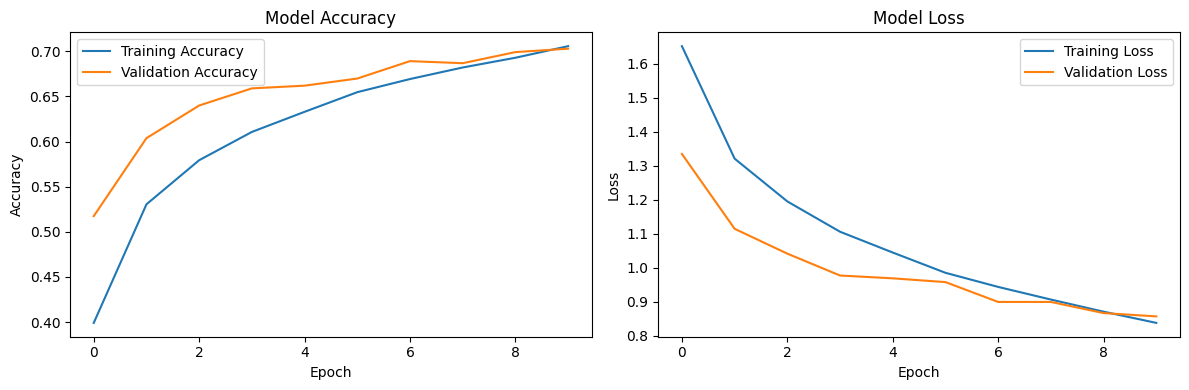

In [19]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy on the first subplot
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].legend()

# Plot loss on the second subplot
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Loss')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

### Model Performance Insights

#### **Accuracy Plot**
- Both training and validation accuracy improve consistently over the epochs.  
- Validation accuracy starts higher in the early epochs but eventually converges with training accuracy.  
- No clear signs of overfitting, as validation accuracy does not decline while training accuracy increases.  

#### **Loss Plot**
- Both training and validation loss steadily decrease, indicating effective learning.  
- Validation loss remains slightly lower than training loss, suggesting good generalization.  

#### **Conclusion**
The model is learning well and generalizing effectively. Potential improvements could include:
- **Data Augmentation**: To make the model more robust.  
- **Hyperparameter Tuning**: Adjusting learning rate, batch size, or number of layers.  
- **Regularization Techniques**: Adding dropout layers or L2 regularization to prevent overfitting.  

### Evaluate the Model on Test Data

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7075 - loss: 0.8532
Test Accuracy: 0.7030, Test Loss: 0.8572


### Make Predictions on New Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


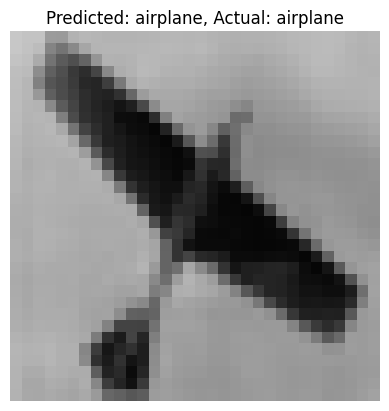

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random test image
index = np.random.randint(len(X_test))
image = X_test[index]
true_label = np.argmax(y_test[index])

# Make prediction
prediction = model.predict(image.reshape(1, 32, 32, 3))
predicted_label = np.argmax(prediction)

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the image
plt.imshow(image)
plt.title(f"Predicted: {class_names[predicted_label]}, Actual: {class_names[true_label]}")
plt.axis("off")
plt.show()

### Save the Model for Future Use

In [22]:
model.save("cifar10_cnn_model.h5")